In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Files/nih/train-small.csv')

In [18]:
class_counts = df.sum().drop(['Image', 'PatientId'])
class_counts.index

Index(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
       'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule',
       'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


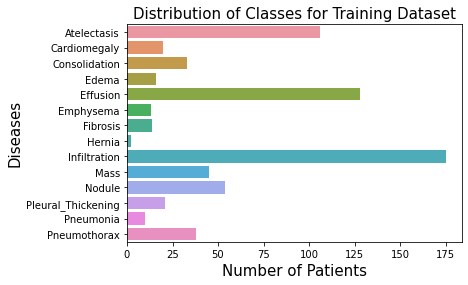

In [24]:
sns.barplot(class_counts.values, class_counts.index)
plt.title('Distribution of Classes for Training Dataset', fontsize=15)
plt.xlabel('Number of Patients', fontsize=15)
plt.ylabel('Diseases', fontsize=15)
plt.show()

In [25]:
# Generate an array of 4 binary label values, 3 positive and 1 negative
y_true = np.array(
        [[1],
         [1],
         [1],
         [0]])
print(f"y_true: \n{y_true}")

y_true: 
[[1]
 [1]
 [1]
 [0]]


In [26]:
# model 1
y_pred_1 = 0.9*(np.ones(y_true.shape))
print(y_pred_1)

#model 2
y_pred_2 = 0.1*(np.ones(y_true.shape))
print(y_pred_2)

[[0.9]
 [0.9]
 [0.9]
 [0.9]]
[[0.1]
 [0.1]
 [0.1]
 [0.1]]


### Problems with the regular loss function
The learning goal here is to notice that with a regular loss function (not a weighted loss), the model that always outputs 0.9 has a smaller loss (performs better) than model 2.
- This is because there is a class imbalance, where 3 out of the 4 labels are 1.
- If the data were perfectly balanced, (two labels were 1, and two labels were 0), model 1 and model 2 would have the same loss.  Each would get two examples correct and two examples incorrect.
- However, since the data is not balanced, the regular loss function implies that model 1 is better than model 2.

### Calculate model 1 loss

In [27]:
def cross_entropy_loss(y_true, y_pred):
    loss = -1*np.sum(y_true* np.log(y_pred) +
                     (1-y_true)* np.log(1-y_pred))
    return loss

In [29]:
loss_1 = cross_entropy_loss(y_true, y_pred_1)
loss_2 = cross_entropy_loss(y_true, y_pred_2)
loss_1, loss_2

(2.618666639967525, 7.013115794639963)

### How a weighted loss treats both models the same
With a weighted loss function, you will get the same weighted loss when the predictions are all 0.9 versus when the predictions are all 0.1.  
- Notice how a prediction of 0.9 is 0.1 away from the positive label of 1.
- Also notice how a prediction of 0.1 is 0.1 away from the negative label of 0
- So model 1 and 2 are "symmetric" along the midpoint of 0.5, if you plot them on a number line between 0 and 1.

In [42]:
def weighted_cross_entropy_loss(y_true, y_pred):
    
    loss_positive = -1* np.sum(y_true*np.log(y_pred))
    loss_negative = -1* np.sum((1-y_true) * np.log(1-y_pred))
    
    w_neg = np.sum(y_true)/y_true.shape[0]
    w_pos = 1-w_neg
    
    loss = w_neg * loss_negative + w_pos * loss_positive
    
    return loss

In [45]:
w_loss1 = weighted_cross_entropy_loss(y_true, y_pred_1)
w_loss2 = weighted_cross_entropy_loss(y_true, y_pred_2)
w_loss1, w_loss2

(1.805959206488904, 1.8059592064889038)

### Weighted Loss for more than one class

In [46]:
y_true = np.array(
        [[1,0],
         [1,0],
         [1,0],
         [1,0],
         [0,1]
        ])
y_true

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1]])

In [55]:
w_neg = np.sum(y_true, axis = 0)/ y_true.shape[0] 
w_pos = 1-w_neg
w_neg, w_pos

(array([0.8, 0.2]), array([0.2, 0.8]))

In [56]:
# Set model predictions where all predictions are the same
y_pred = np.ones(y_true.shape)
y_pred[:,0] = 0.3 * y_pred[:,0]
y_pred[:,1] = 0.7 * y_pred[:,1]
y_pred

array([[0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7]])

In [61]:
## Loss for class 0
loss_0 = weighted_cross_entropy_loss(y_true[:,0], y_pred[:,0])
loss_1 = weighted_cross_entropy_loss(y_true[:,1], y_pred[:,1])
loss_0, loss_1

(1.2485181986117346, 1.2485181986117349)